In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

import Figure_H2H_Regret

In [2]:
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
grid = (3,3) # grid size
from Network import network_design
Network = network_design()
arcs,arc_index_mapping = Network._getArcs(grid)

num_test = 1000
lower = 0 # coef lower bound
upper = 1 # coef upper bound
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_nodes = grid[0]*grid[0]
coef_seed = 1

x_dist = 'uniform'
e_dist = 'normal'
x_low = -2
x_up = 2
x_mean = 2
x_var = 2
bump = 100

In [4]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
DataPath_Parent = project_directory + '/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_' + data_generation_process + f'/{grid[0]}by{grid[1]}_grid_All/'
pathlib.Path(DataPath_Parent).mkdir(parents=True, exist_ok=True)
print("DataPath_parent:", DataPath_Parent)
Result_dir = DataPath_Parent + "Result/"
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

DataPath_parent: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/


### Impact of model misspecification when N increase

In [5]:
num_feat = 5 # size of feature
p = num_feat
e = 0.5 # scale of normal std or the range of uniform. For the error term
alpha = e # scale of normal std or the range of uniform. For the error term
iteration_all = np.arange(0,100)
batch_size = 20
num_epochs = 1000
num_train_all = [500]
mu_all = [0.75]
lamb_all = [0.8]
deg_all = [1.0,2.0,4.0,6.0,8.0] # polynomial degree

##### Data Generation

In [6]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"x_test_all.pkl"):
            print("Already Exist")
        else:
            x_test_all, c_test_all, x_train_all, c_train_all,noise_train_all,noise_test_all,W_star_all = \
            DS_Obj.Simulator(DataPath,lower, upper, p, d, coef_seed,iteration_all,num_test, num_train, alpha,mis,data_generation_process,x_dist, e_dist, x_low, x_up, x_mean, x_var, bump)
            Data_LSM.store_input_data(DataPath,x_test_all,c_test_all,x_train_all,c_train_all,noise_test_all,noise_train_all,W_star_all)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

##### Run Oracle

In [7]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
            print("Results already exist")
        else:
            SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
Oracle: iter= 20 ,cost_Oracle_Ante= 15.096535898629712
Oracle: iter= 40 ,cost_Oracle_Ante= 14.590733464812468
Oracle: iter= 60 ,cost_Oracle_Ante= 15.022101085286174
Oracle: iter= 80 ,cost_Oracle_Ante= 14.867069378054255
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Oracle: iter= 20 ,cost_Oracle_Ante= 37.00671277293966
Oracle: iter= 40 ,cost_Oracle_Ante= 33.86623987151365
Oracle: iter= 60 ,cost_Oracle_Ante= 36.10194318886101
Oracle: iter= 80 ,cost_Oracle_Ante= 35.626978702450025


##### Run OLS

In [8]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
            print("Results already exist")
        else:
            SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 15.12187223704079
OLS: iter= 40 ,cost_OLS_Ante= 14.617217503266208
OLS: iter= 60 ,cost_OLS_Ante= 15.036388146202594
OLS: iter= 80 ,cost_OLS_Ante= 14.883867265629533
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 37.044001067156856
OLS: iter= 40 ,cost_OLS_Ante= 33.94070507352056
OLS: iter= 60 ,cost_OLS_Ante= 36.175501810172356
OLS: iter= 80 ,cost_OLS_Ante= 35.65585593422037
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Gene

##### Run DDR

In [9]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.121498863313887
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 14.617826803486285
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.036334813418883
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 14.884368154442942
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 37.042671635365394
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 33.94090576341672
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 36.17546382163078
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.

##### Run SPO+

In [10]:
for num_train in num_train_all:
    method_names = ["spo+"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 15.138965999965748
['spo+'] : iter= 40 ,cost_EPO_Ante= 14.642592337153301
['spo+'] : iter= 60 ,cost_EPO_Ante= 15.058470043170113
['spo+'] : iter= 80 ,cost_EPO_Ante= 14.910529416601412
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 37.17764310168836
['spo+'] : iter= 40 ,cost_EPO_Ante= 34.2686788827126
['spo+'] : iter= 60 ,cost_EPO_Ante= 36.23724610671503
['spo+'] : iter= 80 ,cost_EPO_Ante= 35.77660852106126
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortes

##### Run PG

In [46]:
for num_train in num_train_all:
    method_names = ["pg"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_pg_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 15.548440980194721
['pg'] : iter= 40 ,cost_EPO_Ante= 15.109600779551995
['pg'] : iter= 60 ,cost_EPO_Ante= 15.969963798723802
['pg'] : iter= 80 ,cost_EPO_Ante= 15.617014194452342
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 37.98223823925467
['pg'] : iter= 40 ,cost_EPO_Ante= 34.20018843738153
['pg'] : iter= 60 ,cost_EPO_Ante= 36.746952132092446
['pg'] : iter= 80 ,cost_EPO_Ante= 36.03172306430273
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/M

##### Run LTR

In [47]:
for num_train in num_train_all:
    method_names = ["ltr"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_ltr_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 15.260365854580954
['ltr'] : iter= 40 ,cost_EPO_Ante= 14.851466882097226
['ltr'] : iter= 60 ,cost_EPO_Ante= 15.124952634732166
['ltr'] : iter= 80 ,cost_EPO_Ante= 15.332828347498213
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 38.54865752851457
['ltr'] : iter= 40 ,cost_EPO_Ante= 34.56197151575898
['ltr'] : iter= 60 ,cost_EPO_Ante= 38.2007663635966
['ltr'] : iter= 80 ,cost_EPO_Ante= 41.67306435871645
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_F

### Comparison

In [13]:
def h2h_regret(iteration_all,cost_this_all,cost_bench_all,cost_Oracle_Ante_all):
    h2h_ = np.zeros(len(iteration_all)); cost_rd_ = np.zeros(len(iteration_all)); regret_rd_ = np.zeros(len(iteration_all))
    for iter_index in range(len(iteration_all)):
        iter = iteration_all[iter_index]
        h2h_[iter_index],cost_rd_[iter_index],regret_rd_[iter_index] = h2h_regret_eva.cross_compare2plus(cost_this_all[iter], cost_bench_all[iter], cost_Oracle_Ante_all[iter])
    return h2h_,regret_rd_

In [14]:
def calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,this_method,benchmark_methods,is_ddr,mu,lamb,is_bench_ddr):
    h2h_ddr_vs_ = {}; cost_rd_ddr_vs_ = {}; regret_rd_ddr_vs_ = {}
    for num_train in num_train_all:
        for deg in deg_all:
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)     
            with open(DataPath+'cost_Oracle_Ante_all.pkl', "rb") as tf:
                cost_Oracle_Ante_all = pickle.load(tf)
            with open(DataPath+this_method, "rb") as tf:
                cost_this = pickle.load(tf)
            with open(DataPath+benchmark_methods, "rb") as tf:
                cost_bench = pickle.load(tf)

            if is_ddr:
                cost_this_input = {}
                for iter in iteration_all:
                    cost_this_input[iter] = cost_this[iter,mu,lamb]
            else:
                cost_this_input = cost_this
            if is_bench_ddr:
                cost_bench_input = {}
                for iter in iteration_all:
                    cost_bench_input[iter] = cost_bench[iter,mu,lamb]
            else:
                cost_bench_input = cost_bench

            h2h_ddr_vs_[num_train,deg],regret_rd_ddr_vs_[num_train,deg] = h2h_regret(iteration_all,cost_this_input,cost_bench_input,cost_Oracle_Ante_all)

        print("num_train = ",num_train,",deg = ",deg)
    return h2h_ddr_vs_,regret_rd_ddr_vs_

In [15]:
def obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,benchmark):
    h2h_ = {}; cost_rd_ = {}; regret_rd_ = {}
    for num_train in num_train_all:
        for deg in deg_all:
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)     
            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
                cost_SPO_Ante_all = pickle.load(tf)
            # with open(DataPath+'cost_rf_Ante_all.pkl', "rb") as tf:
            #     cost_RF_Ante_all = pickle.load(tf)
            # with open(DataPath+'cost_xg_Ante_all.pkl', "rb") as tf:
                # cost_XG_Ante_all = pickle.load(tf)
            # with open(DataPath+'cost_pg_Ante_all.pkl', "rb") as tf:
            #     cost_PG_Ante_all = pickle.load(tf)
            # with open(DataPath+'cost_ltr_Ante_all.pkl', "rb") as tf:
            #     cost_LTR_Ante_all = pickle.load(tf)

            for mu in mu_all:
                for lamb in lamb_all:
                    if benchmark == "OLS":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
                    if benchmark == "SPO+":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
                    # if benchmark == "RF":
                    #     h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_RF_Ante_all,cost_Oracle_Ante_all)
                    # if benchmark == "XG":
                    #     h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_XG_Ante_all,cost_Oracle_Ante_all)
                    if benchmark == "PG":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_PG_Ante_all,cost_Oracle_Ante_all)
                    if benchmark == "LTR":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_LTR_Ante_all,cost_Oracle_Ante_all)
            print("num_train = ",num_train,",deg = ",deg)
    return h2h_,regret_rd_

##### DDR vs SPO

- N = 500,deg = 1.0

In [16]:
# num_train = 1000
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_SPO_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wo_vs_spo_wo,regret_rd_ddr_wo_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_spo+_Ante_all.pkl',True,mu,lamb)

# all_x = h2h_ddr_wo_vs_spo_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wo_vs_spo_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- N = 500,deg = 4.0

In [17]:
# num_train = 500
# deg = deg_all[2]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_SPO_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- N = 500,deg = 8.0

In [18]:
# num_train = 500
# deg = deg_all[3]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_SPO_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs PG

In [19]:
# h2h_ddr_vs_pg,regret_rd_ddr_vs_pg = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"PG")

- N = 500, deg = 8.0

In [20]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_PG_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_pg[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_pg[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs LTR

In [21]:
# h2h_ddr_vs_ltr,regret_rd_ddr_vs_ltr = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"LTR")

- N = 500, deg = 8.0

In [22]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_LTR_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_ltr[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_ltr[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs OLS

In [23]:
# h2h_ddr_vs_ols,regret_rd_ddr_vs_ols = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"OLS")

- N = 500, deg = 8.0

In [24]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_OLS_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_ols[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_ols[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

### Run Approahces with quadratic term

##### DDR with quadratic

In [25]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_DDR_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            ILA.Run_DDR_Quadratic(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.158838680220956
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 14.648367292993772
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.126561527714193
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 14.94648001496353
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 37.106448712932064
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 33.94739285968899
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 36.2545417148396
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 

##### SPO+ with quadratic

In [26]:
for num_train in num_train_all:
    method_names = ["spo+"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_spo+_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 15.206202368314159
['spo+'] : iter= 40 ,cost_EPO_Ante= 14.688737173896072
['spo+'] : iter= 60 ,cost_EPO_Ante= 15.20595824110189
['spo+'] : iter= 80 ,cost_EPO_Ante= 15.02215652327268
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 37.301056201752566
['spo+'] : iter= 40 ,cost_EPO_Ante= 34.033608230409115
['spo+'] : iter= 60 ,cost_EPO_Ante= 36.323267787179056
['spo+'] : iter= 80 ,cost_EPO_Ante= 35.951403905971084
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shor

In [48]:
for num_train in num_train_all:
    method_names = ["pg"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_pg_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 15.78252194063962
['pg'] : iter= 40 ,cost_EPO_Ante= 15.518777439399026
['pg'] : iter= 60 ,cost_EPO_Ante= 15.707002869508795
['pg'] : iter= 80 ,cost_EPO_Ante= 15.86620984951055
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 38.32396253003235
['pg'] : iter= 40 ,cost_EPO_Ante= 36.21623741967527
['pg'] : iter= 60 ,cost_EPO_Ante= 37.45937691690848
['pg'] : iter= 80 ,cost_EPO_Ante= 36.590296560258544
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Mod

In [ ]:
for num_train in num_train_all:
    method_names = ["ltr"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_ltr_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 15.29018812654338
['ltr'] : iter= 40 ,cost_EPO_Ante= 14.693933094033152
['ltr'] : iter= 60 ,cost_EPO_Ante= 15.178994519290033
['ltr'] : iter= 80 ,cost_EPO_Ante= 15.889652896501493
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 39.24106044071748
['ltr'] : iter= 40 ,cost_EPO_Ante= 35.36158647759464
['ltr'] : iter= 60 ,cost_EPO_Ante= 36.79728145046043
['ltr'] : iter= 80 ,cost_EPO_Ante= 36.43592459387965
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_F

##### OLS with quadratic

In [27]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_OLS_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            SLA.Run_OLS_Quadratic(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 15.156218133612114
OLS: iter= 40 ,cost_OLS_Ante= 14.645753229645756
OLS: iter= 60 ,cost_OLS_Ante= 15.128180682404214
OLS: iter= 80 ,cost_OLS_Ante= 14.946999453296783
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 37.108378777672904
OLS: iter= 40 ,cost_OLS_Ante= 33.947051209925135
OLS: iter= 60 ,cost_OLS_Ante= 36.248493535358065
OLS: iter= 80 ,cost_OLS_Ante= 35.7398800281701
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Gen

### Comparison

##### Quadratic vs baseline

- OLS quadratic with OLS without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

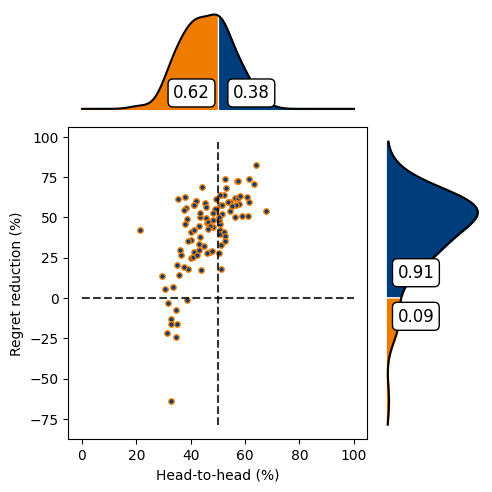

In [40]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'OLS_wi_vs_OLS_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ols_wi_vs_ols_wo,regret_rd_ols_wi_vs_ols_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_OLS_Ante_quad_all.pkl','cost_OLS_Ante_all.pkl',False,mu,lamb,False)
all_x = h2h_ols_wi_vs_ols_wo[num_train,deg] * 100
all_y = regret_rd_ols_wi_vs_ols_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- SPO+ with quadratic with SPO+ without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

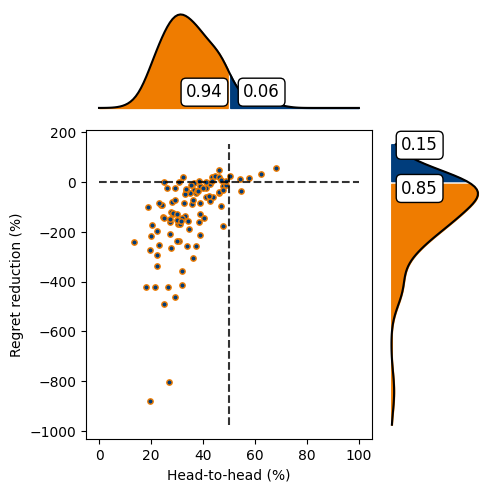

In [39]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'SPO_wi_vs_SPO_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_spo_wi_vs_spo_wo,regret_rd_spo_wi_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_spo+_Ante_quad_all.pkl','cost_spo+_Ante_all.pkl',False,mu,lamb,False)
all_x = h2h_spo_wi_vs_spo_wo[num_train,deg] * 100
all_y = regret_rd_spo_wi_vs_spo_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs DDR without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

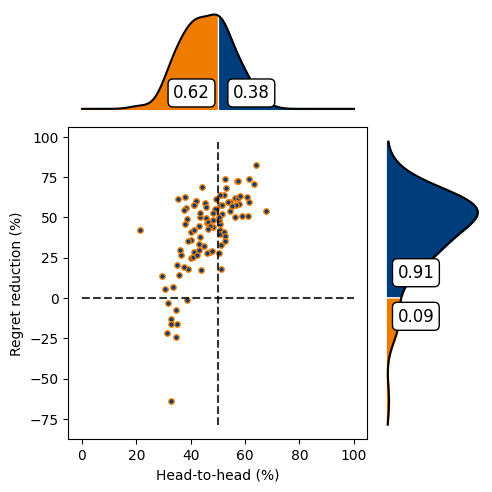

In [41]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_DDR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_ddr_wo,regret_rd_ddr_wi_vs_ddr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_DDR_Ante_all.pkl',True,mu,lamb,True)
all_x = h2h_ddr_wi_vs_ddr_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_ddr_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- PG with quadratic vs PG without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

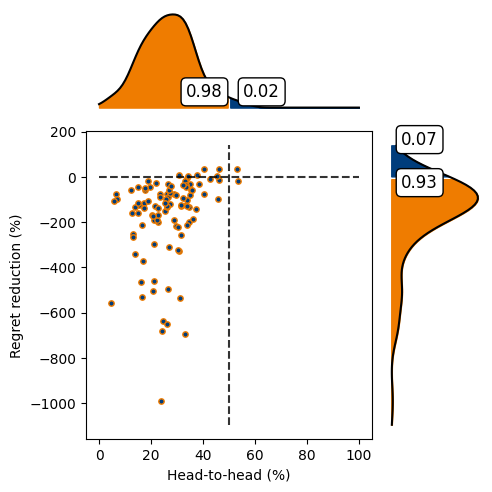

In [52]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'PG_wi_vs_PG_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_pg_wi_vs_pg_wo,regret_rd_pg_wi_vs_pg_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_pg_Ante_quad_all.pkl','cost_pg_Ante_all.pkl',False,mu,lamb,False)
all_x = h2h_pg_wi_vs_pg_wo[num_train,deg] * 100
all_y = regret_rd_pg_wi_vs_pg_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- LTR with quadratic vs LTR without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

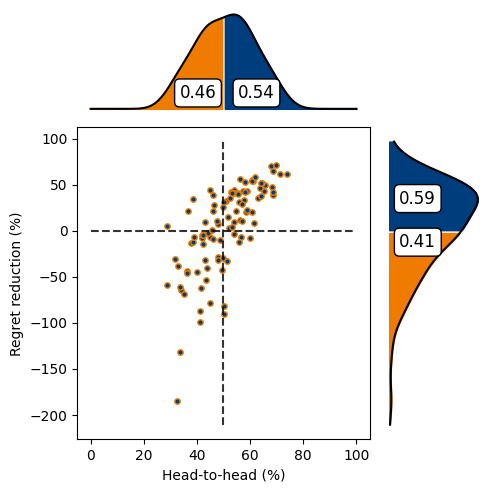

In [53]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'LTR_wi_vs_LTR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ltr_wi_vs_ltr_wo,regret_rd_ltr_wi_vs_ltr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_ltr_Ante_quad_all.pkl','cost_ltr_Ante_all.pkl',False,mu,lamb,False)
all_x = h2h_ltr_wi_vs_ltr_wo[num_train,deg] * 100
all_y = regret_rd_ltr_wi_vs_ltr_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs SPO+ 

- DDR without quadratic vs SPO+ without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

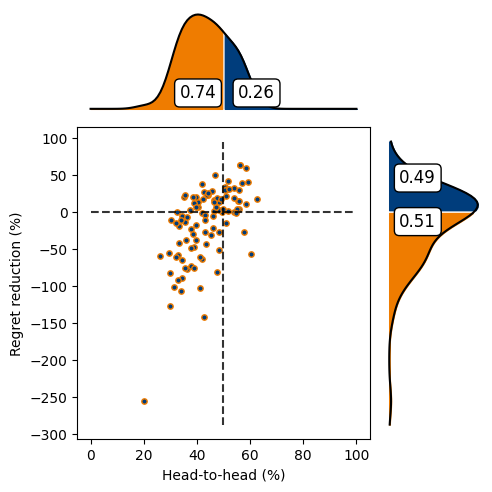

In [42]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wo_vs_SPO_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wo_vs_spo_wo,regret_rd_ddr_wo_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_spo+_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wo_vs_spo_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wo_vs_spo_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR quadratic vs SPO+ without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

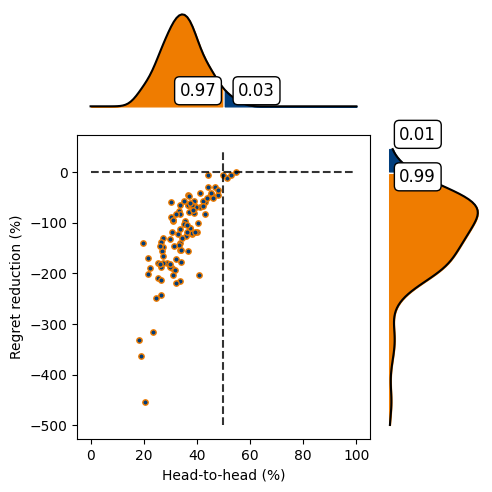

In [43]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_SPO_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_spo_wo,regret_rd_ddr_wi_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_spo+_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_spo_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_spo_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs SPO+ with quadratic 

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

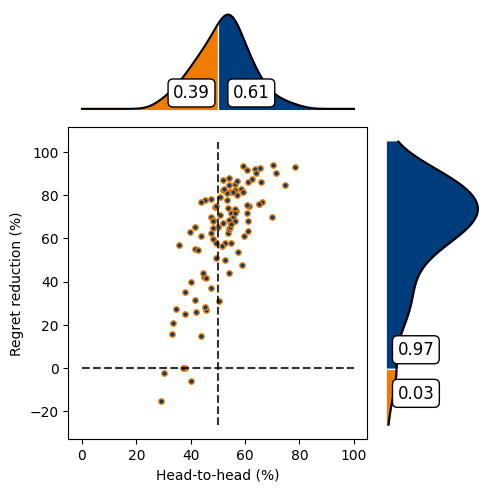

In [45]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_SPO_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_spo_wi,regret_rd_ddr_wi_vs_spo_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl',"cost_spo+_Ante_quad_all.pkl",True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_spo_wi[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_spo_wi[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs PG

- DDR without quadratic vs DDR without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

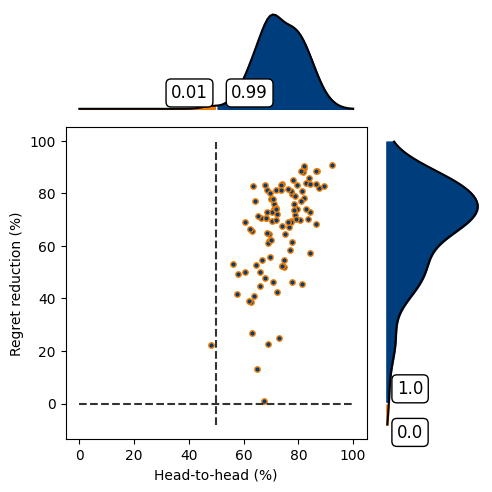

In [54]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wo_vs_PG_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wo_vs_pg_wo,regret_rd_ddr_wo_vs_pg_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_pg_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wo_vs_pg_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wo_vs_pg_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs PG without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

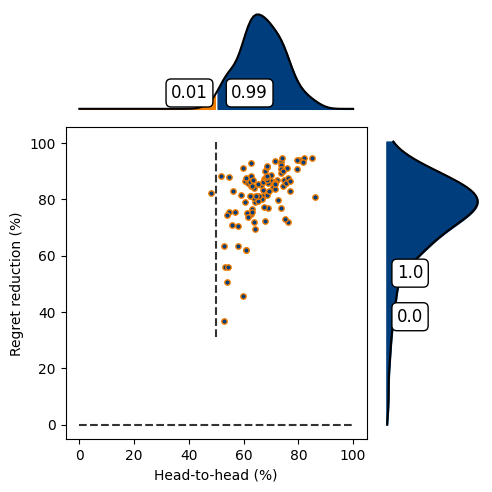

In [55]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_PG_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_pg_wo,regret_rd_ddr_wi_vs_pg_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_pg_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_pg_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_pg_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs PG with quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Code_MacBook/Decision_Driven_Regularization/JOC_R1/Shortest_Path_Reproduce/Figure_H2H_Regret.py:107: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout(pad = 1)


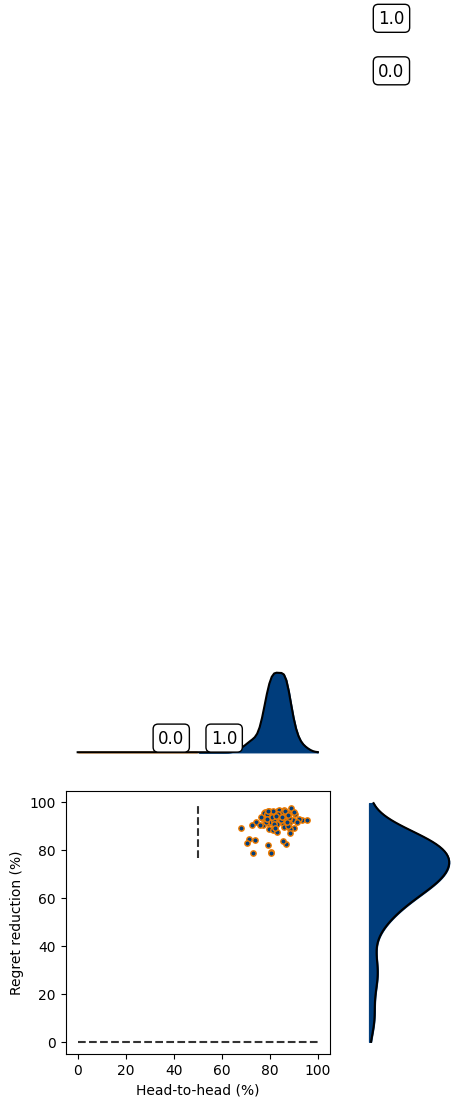

In [ ]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_PG_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_pg_wi,regret_rd_ddr_wi_vs_pg_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_pg_Ante_quad_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_pg_wi[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_pg_wi[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs LTR

- DDR without quadratic with LTR without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

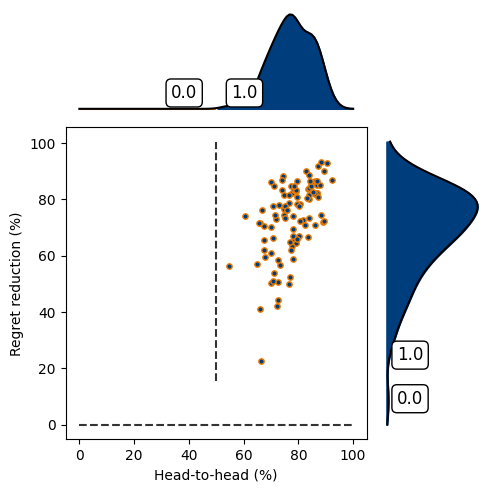

In [64]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wo_vs_LTR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wo_vs_ltr_wo,regret_rd_ddr_wo_vs_ltr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_ltr_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wo_vs_ltr_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wo_vs_ltr_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs LTR without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

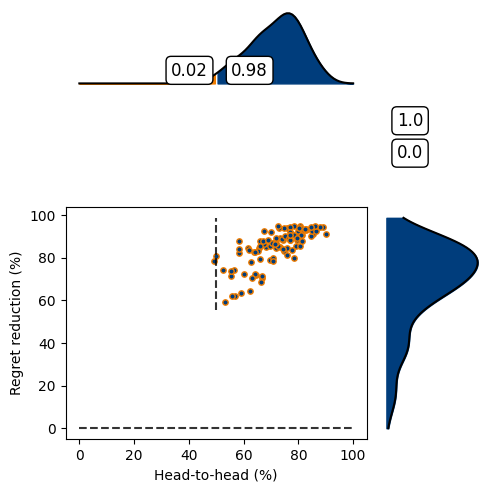

In [65]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_LTR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_ltr_wo,regret_rd_ddr_wi_vs_ltr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_ltr_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_ltr_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_ltr_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs LTR with quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

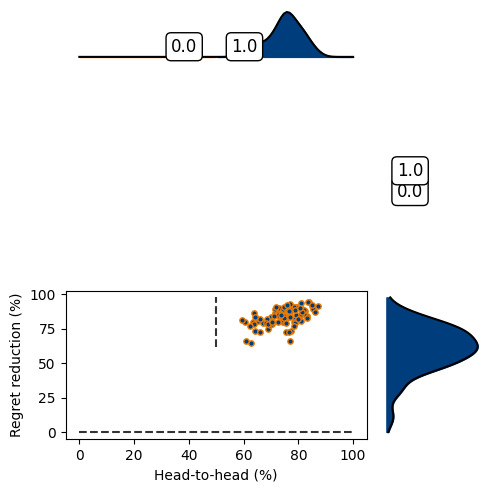

In [66]:
num_train = 500
deg = deg_all[4]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_LTR_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_ltr_wi,regret_rd_ddr_wi_vs_ltr_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_ltr_Ante_quad_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_ltr_wi[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_ltr_wi[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs OLS

- DDR without quadratic with OLS without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

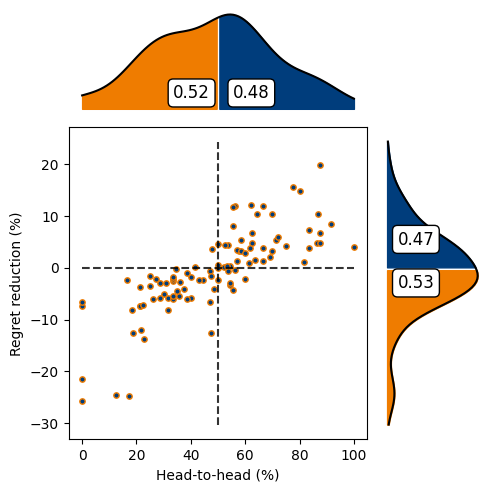

In [35]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_vs_OLS_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wo_vs_ols_wo,regret_rd_ddr_wo_vs_ols_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_OLS_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wo_vs_ols_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wo_vs_ols_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic with OLS without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

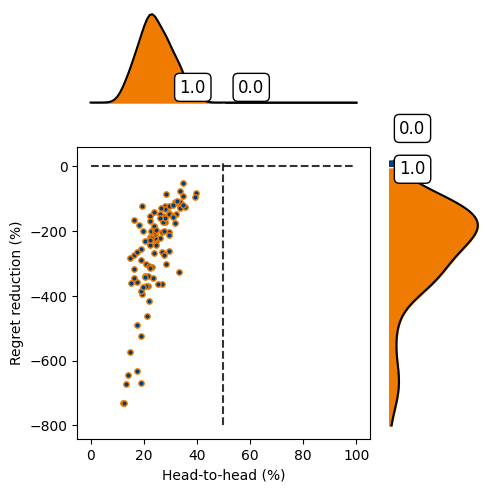

In [36]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_OLS_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_ols_wo,regret_rd_ddr_wi_vs_ols_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_OLS_Ante_all.pkl',True,mu,lamb,False)

all_x = h2h_ddr_wi_vs_ols_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_ols_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs OLS with quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=2.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=4.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Final/Model_Mis_Data_Size_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=6.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

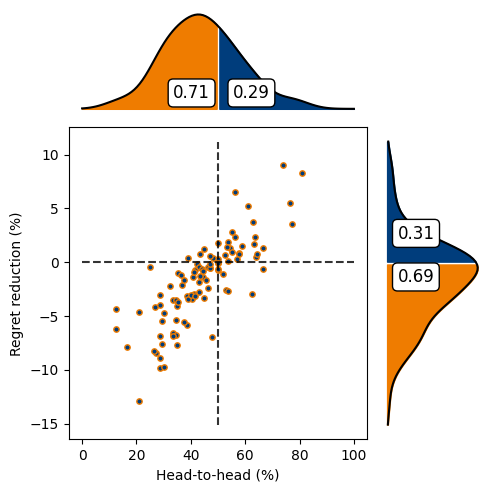

In [37]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_OLS_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_ols_wi,regret_rd_ddr_wi_vs_ols_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_OLS_Ante_quad_all.pkl',True,mu,lamb,False)

all_x = h2h_ddr_wi_vs_ols_wi[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_ols_wi[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)